#### 背景
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.    
数据集包含2013年9月欧洲持卡人通过信用卡进行的交易。此数据集显示了两天内发生的交易，在284,807笔交易中，我们有492起欺诈。数据集高度不平衡，阳性类别（欺诈）占所有交易的0.172％。    

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.   
它仅包含数字输入变量，它们是PCA转换的结果。不幸的是，由于机密性问题，我们无法提供有关数据的原始功能和更多背景信息。功能部件V1，V2，...，V28是使用PCA获得的主要组件，唯一尚未使用PCA转换的功能部件是“时间”和“量”。功能“时间”包含数据集中每个事务和第一个事务之间经过的秒数。功能“金额”是交易金额，此功能可用于与示例相关的成本敏感型学习。要素“类别”是响应变量，在发生欺诈时其值为1，否则为0。   

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#显示所有列
pd.set_option('display.max_columns', None)
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Class为label标签列，0表示正常客户，1表示欺诈客户。
V1-V28是经过降维压缩(PCA)等转换手段得到的28个特征

In [2]:
path='./'
data=pd.read_csv(path+'input/creditcard.csv')
print(data.head())
print(data.info())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20 

查看数据缺失情况

In [3]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

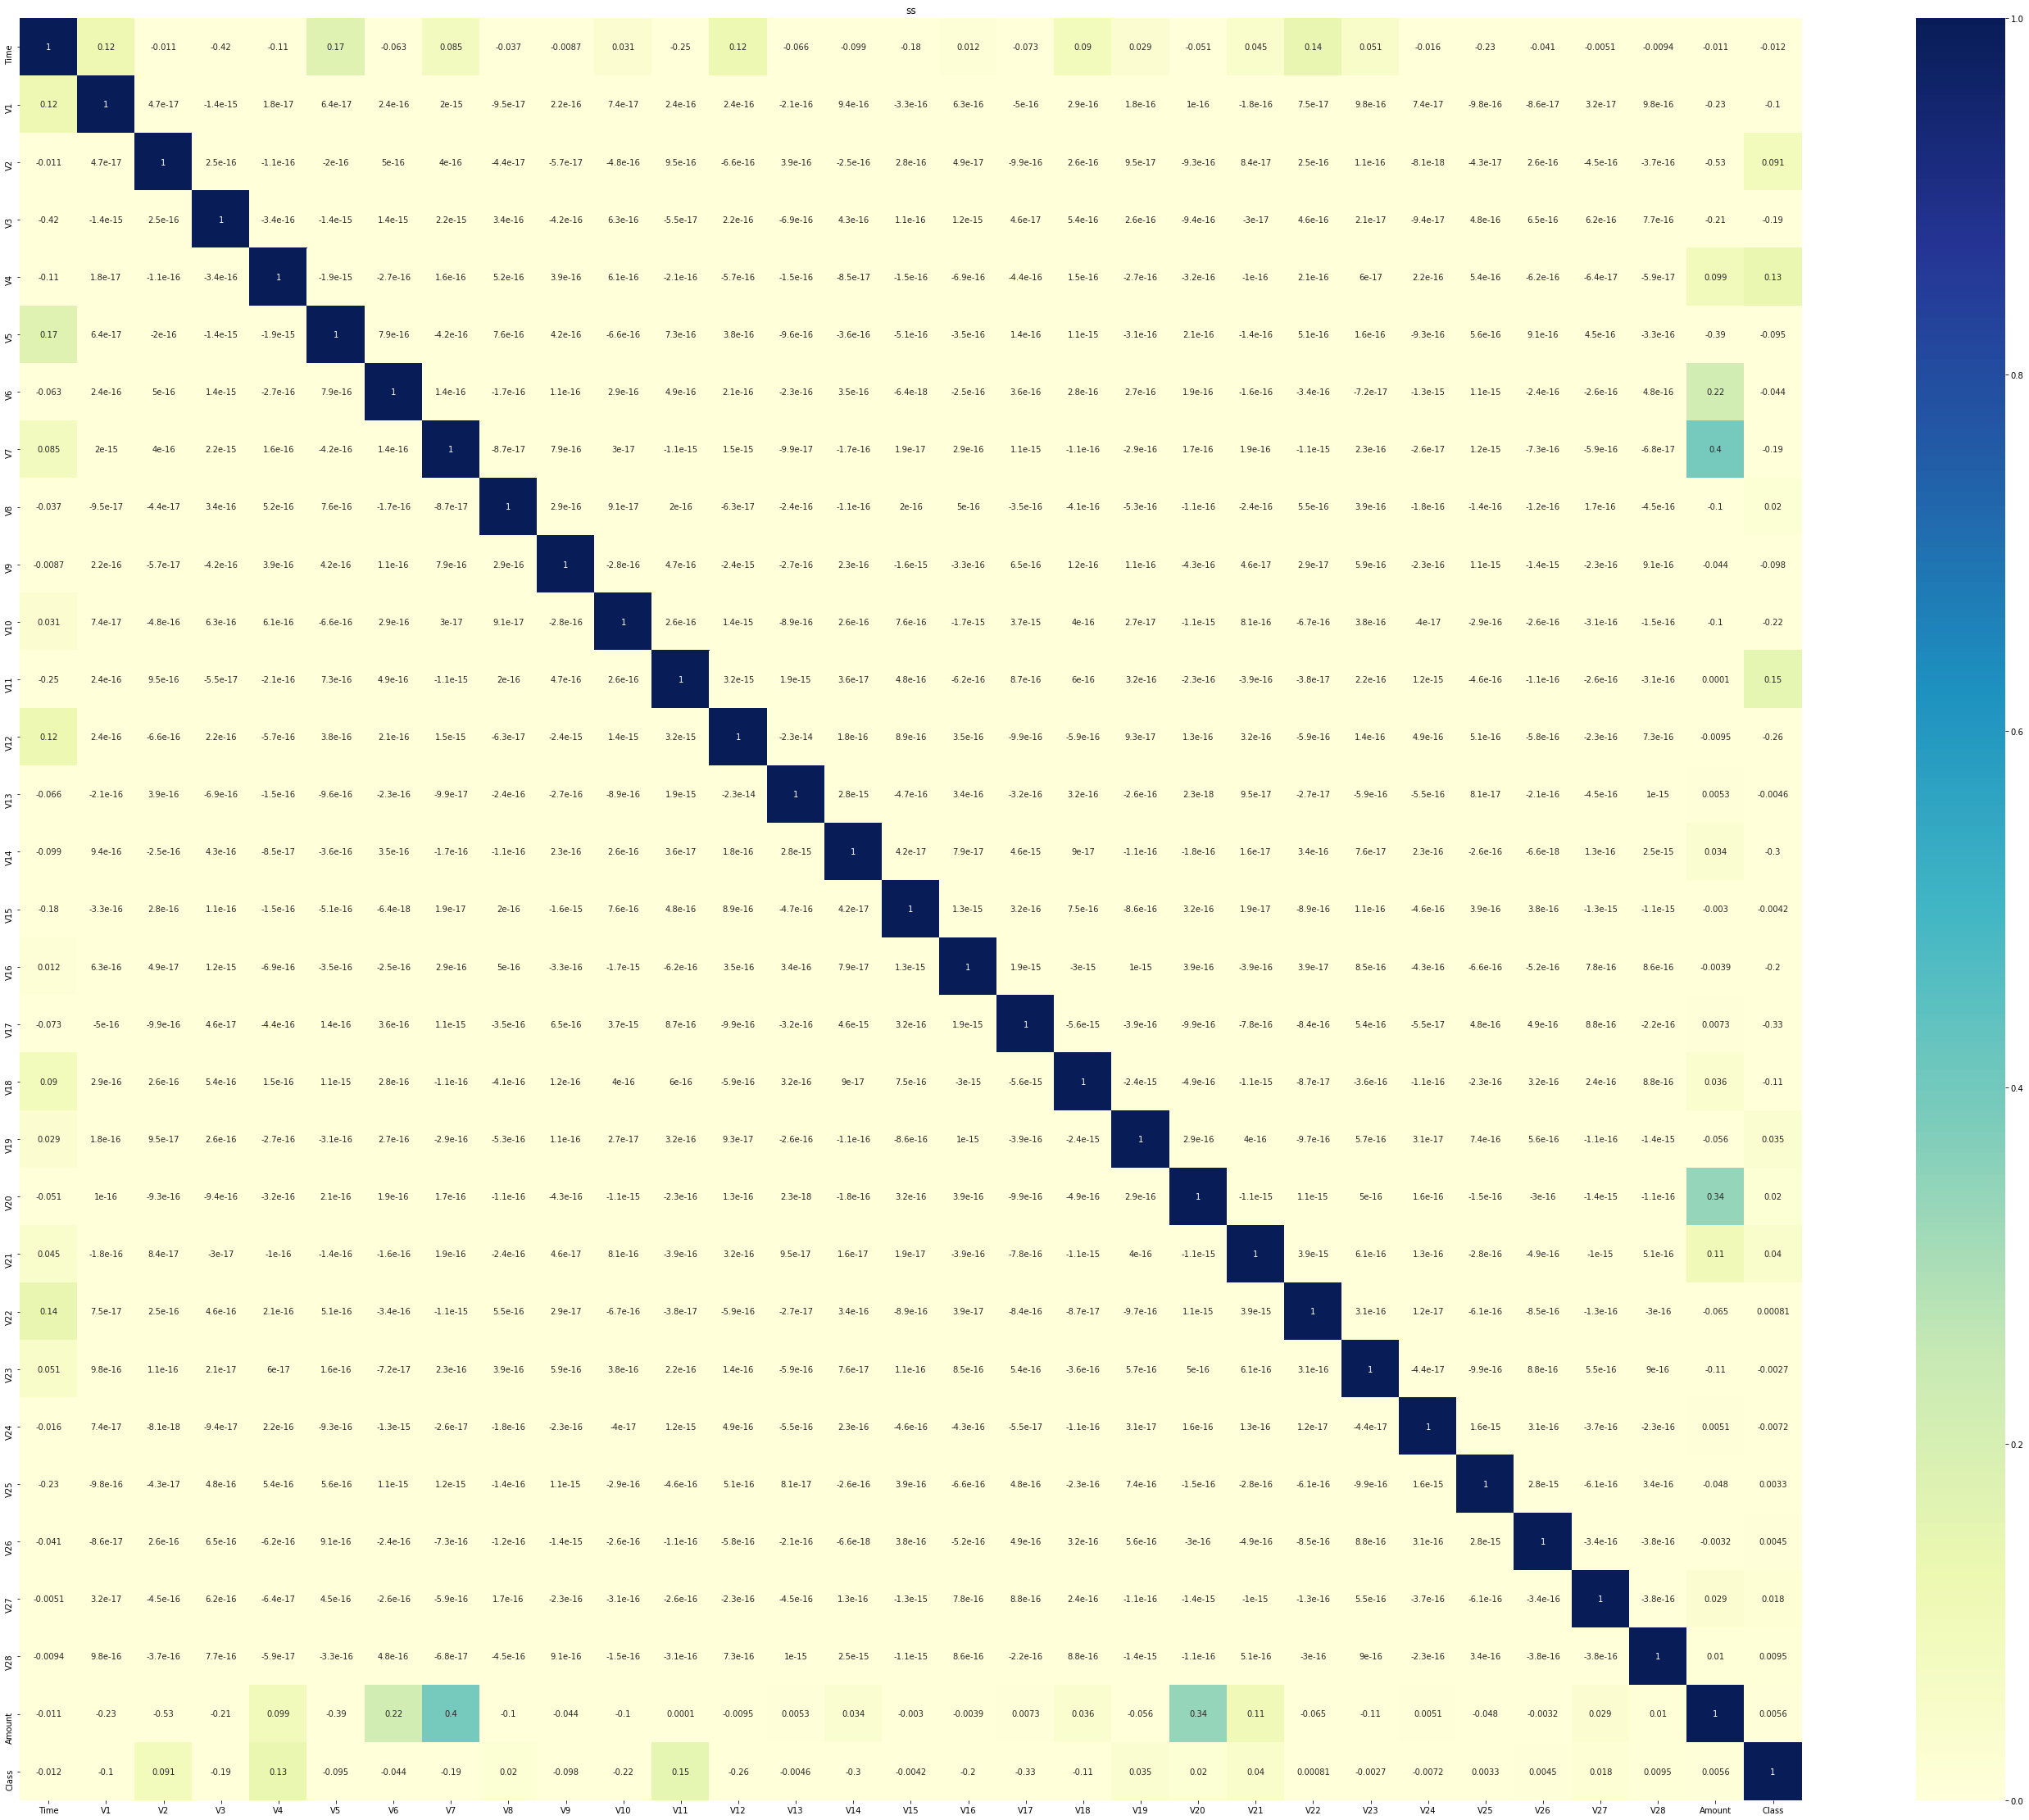

In [4]:
#查看特征直接的相关性
corr = data.corr()
plt.figure(figsize=(50,40))
sns.heatmap(corr,annot=True, vmax=1,vmin = 0, xticklabels= True, yticklabels= True, square=True, cmap="YlGnBu")
plt.title('ss')
plt.show()

In [5]:
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,3.061663e-02,-2.476894e-01,1.243481e-01,-6.590202e-02,-9.875682e-02,-1.834533e-01,1.190287e-02,-7.329721e-02,9.043813e-02,2.897530e-02,-5.086602e-02,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.697350e-17,-1.424390e-15,1.755316e-17,6.391162e-17,2.398071e-16,1.991550e-15,-9.490675e-17,2.169581e-16,7.433820e-17,2.438580e-16,2.422086e-16,-2.115458e-16,9.352582e-16,-3.252451e-16,6.308789e-16,-5.011524e-16,2.870125e-16,1.818128e-16,1.036959e-16,-1.755072e-16,7.477367e-17,9.808705e-16,7.354269e-17,-9.805358e-16,-8.621897e-17,3.208233e-17,9.820892e-16,-0.227709,-0.101347
V2,-0.010593,4.697350e-17,1.000000e+00,2.512175e-16,-1.126388e-16,-2.039868e-16,5.024680e-16,3.966486e-16,-4.413984e-17,-5.728718e-17,-4.782388e-16,9.468995e-16,-6.588252e-16,3.854521e-16,-2.541036e-16,2.831060e-16,4.934097e-17,-9.883008e-16,2.636654e-16,9.528280e-17,-9.309954e-16,8.444409e-17,2.500830e-16,1.059562e-16,-8.142354e-18,-4.261894e-17,2.601622e-16,-4.478472e-16,-3.676415e-16,-0.531409,0.091289
V3,-0.419618,-1.424390e-15,2.512175e-16,1.000000e+00,-3.416910e-16,-1.436514e-15,1.431581e-15,2.168574e-15,3.433113e-16,-4.233770e-16,6.289267e-16,-5.501758e-17,2.206522e-16,-6.883375e-16,4.271336e-16,1.122756e-16,1.183364e-15,4.576619e-17,5.427965e-16,2.576773e-16,-9.429297e-16,-2.971969e-17,4.648259e-16,2.115206e-17,-9.351637e-17,4.771164e-16,6.521501e-16,6.239832e-16,7.726948e-16,-0.210880,-0.192961
V4,-0.105260,1.755316e-17,-1.126388e-16,-3.416910e-16,1.000000e+00,-1.940929e-15,-2.712659e-16,1.556330e-16,5.195643e-16,3.859585e-16,6.055490e-16,-2.083600e-16,-5.657963e-16,-1.506129e-16,-8.522435e-17,-1.507718e-16,-6.939204e-16,-4.397925e-16,1.493667e-16,-2.656938e-16,-3.223123e-16,-9.976950e-17,2.099922e-16,6.002528e-17,2.229738e-16,5.394585e-16,-6.179751e-16,-6.403423e-17,-5.863664e-17,0.098732,0.133447
V5,0.173072,6.391162e-17,-2.039868e-16,-1.436514e-15,-1.940929e-15,1.000000e+00,7.926364e-16,-4.209851e-16,7.589187e-16,4.205206e-16,-6.601716e-16,7.342759e-16,3.761033e-16,-9.578659e-16,-3.634803e-16,-5.132620e-16,-3.517076e-16,1.425729e-16,1.109525e-15,-3.138234e-16,2.076048e-16,-1.368701e-16,5.060029e-16,1.637596e-16,-9.286095e-16,5.625102e-16,9.144690e-16,4.465960e-16,-3.299167e-16,-0.386356,-0.094974
V6,-0.063016,2.398071e-16,5.024680e-16,1.431581e-15,-2.712659e-16,7.926364e-16,1.000000e+00,1.429426e-16,-1.707421e-16,1.114447e-16,2.850776e-16,4.865799e-16,2.140589e-16,-2.268061e-16,3.452801e-16,-6.368111e-18,-2.477917e-16,3.567582e-16,2.811474e-16,2.717167e-16,1.898638e-16,-1.575903e-16,-3.362902e-16,-7.232186e-17,-1.261867e-15,1.081933e-15,-2.378414e-16,-2.623818e-16,4.813155e-16,0.215981,-0.043643
V7,0.084714,1.991550e-15,3.966486e-16,2.168574e-15,1.556330e-16,-4.209851e-16,1.429426e-16,1.000000e+00,-8.691834e-17,7.933251e-16,3.043333e-17,-1.084105e-15,1.510045e-15,-9.892325e-17,-1.729462e-16,1.936832e-17,2.893672e-16,1.149692e-15,-1.116789e-16,-2.874017e-16,1.744242e-16,1.938604e-16,-1.058131e-15,2.327911e-16,-2.589727e-17,1.174169e-15,-7.334507e-16,-5.886825e-16,-6.836764e-17,0.397311,-0.187257
V8,-0.036949,-9.490675e-17,-4.413984e-17,3.433113e-16,5.195643e-16,7.589187e-16,-1.707421e-16,-8.691834e-17,1.000000e+00,2.900829e-16,9.051847e-17,1.954747e-16,-6.266057e-17,-2.382948e-16,-1.131098e-16,2.021491e-16,5.027192e-16,-3.508777e-16,-4.093852e-16,-5.339821e-16,-1.095534e-16,-2.412439e-16,5.475559e-16,3.897104e-16,-1.802967e-16,-1.390791e-16,-1.209975e-16,1.733633e-16,-4.484325e-16,-0.103079,0.019875
V9,-0.008660,2.169581e-16,-5.728718e-17,-4.233770e-16,3.859585e-16,4.205206e-16,1.114447e-16,7.933251e-16,2.900829e-16,1.000000e+00,-2.771761e-16,4.682341e-16,-2.445230e-15,-2.650351e-16,2.343317e-

查看Class类别分布,可以发现类别极度不平衡

In [6]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

因为需要使用LR回归跑模型，所以我们需要剔除一些列，并把所有特征列进行标准化

In [7]:
from sklearn.preprocessing import StandardScaler
data['Amount'] = StandardScaler().fit_transform(np.array(data['Amount']).reshape(-1,1))#.reshape(-1,1)

#### 1.调整类别不平衡的做法：上采样和下采样
####  下采样

In [8]:
undersample_seed=0
num_Card_Fraud = data[data["Class"]==1].shape[0]
num_Card_Fraud

492

In [9]:
Normal_users = data[data["Class"]==0].index.values
Normal_users_selection = np.random.RandomState(undersample_seed).choice(
    Normal_users, size=num_Card_Fraud, replace=False
)
len(Normal_users_selection)

492

In [10]:
Card_Fraud = data[data["Class"]==1].index.values
selected_users = list(set(Normal_users_selection).union(set(Card_Fraud)))

In [11]:
new_train = data.loc[selected_users].copy()
new_train["Class"].value_counts()

1    492
0    492
Name: Class, dtype: int64

因为需要使用LR回归跑模型，所以我们需要剔除一些列，并把所有特征列进行标准化

In [12]:
from sklearn.preprocessing import StandardScaler
new_train['Amount'] = StandardScaler().fit_transform(np.array(new_train['Amount']).reshape(-1,1))#.reshape(-1,1)
feats = [i for i in new_train.columns if i not in ['Time','Class']]
train=new_train[feats]
label = new_train["Class"]

In [13]:
label.value_counts()

1    492
0    492
Name: Class, dtype: int64

#### 1.逻辑回归参数详解：
C：浮点型，默认：1.0；其值等于正则化强度的倒数，为正的浮点数。数值越小表示正则化越强。获得最好的C

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
lg=LogisticRegression()
clf=GridSearchCV(lg,param_grid=[{'C':np.arange(0.001,0.05,0.001)}],cv=5)
clf.fit(train,label)
best_model=clf.best_estimator_
clf.best_params_

E:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

E:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

E:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

E:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

{'C': 0.010000000000000002}

#### 未采用下采样 和 采用下采样 的混淆矩阵对比

In [15]:

from sklearn.model_selection import train_test_split
# 切分训练集和测试集
train_x, test_x, train_y, test_y = train_test_split(data[feats],data["Class"],test_size = 0.3, random_state =42)
print("or_train: ", len(train_x))
print("or_test: ", len(test_x))
print("or_data: ", len(data))
# 切分下采样训练集和下采样测试集
train_x_us, test_x_us, train_y_us, test_y_us = train_test_split(new_train[feats],new_train["Class"],test_size = 0.3,random_state = 42)
print('-----------------------------------------------------------')
print("undersample_len_of_train: ", len(train_x_us))
print("undersample_len_of_test: ", len(test_x_us))
print("undersample_len_of_train: ", len(new_train))

or_train:  199364
or_test:  85443
or_data:  284807
-----------------------------------------------------------
undersample_len_of_train:  688
undersample_len_of_test:  296
undersample_len_of_train:  984


In [16]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix,recall_score,classification_report 

In [17]:
import matplotlib.pyplot as plt
def plt_confusion(cm, classes,title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    set_of_class = np.arange(len(classes))
    plt.xticks(set_of_class, classes, rotation=0)
    plt.yticks(set_of_class, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

下采样逻辑回归数据集召回率Recall:  0.9230769230769231


E:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


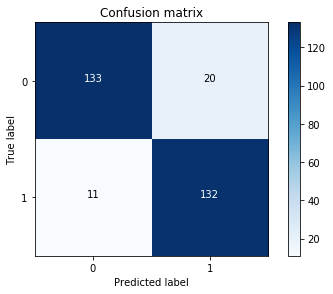

In [20]:
import itertools
model = LogisticRegression(C = 0.01, penalty = 'l1')
model.fit(train_x_us,train_y_us)
pred_y_us = model.predict(test_x_us)

# Compute confusion matrix
confusion_matrix_ = confusion_matrix(test_y_us,pred_y_us)
np.set_printoptions(precision=2)
print("下采样逻辑回归数据集召回率Recall: ", confusion_matrix_[1,1]/(confusion_matrix_[1,0]+confusion_matrix_[1,1]))
classes = [0,1]
plt.figure()
plt_confusion(confusion_matrix_, classes=classes, title='Confusion matrix')
plt.show()

E:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


源数据集召回率Recall:  0.5588235294117647


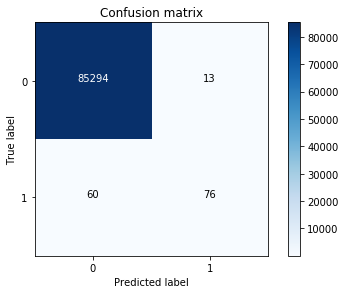

In [21]:
import itertools
model = LogisticRegression(C = 0.01, penalty = 'l1')
model.fit(train_x,train_y)
pred_y= model.predict_proba(test_x)

# Compute confusion matrix
confusion_matrix_ = confusion_matrix(test_y,pred_y)
np.set_printoptions(precision=2)
print("源数据集召回率Recall: ", confusion_matrix_[1,1]/(confusion_matrix_[1,0]+confusion_matrix_[1,1]))
classes = [0,1]
plt.figure()
plt_confusion(confusion_matrix_, classes=classes, title='Confusion matrix')
plt.show()

下采样SVM数据集召回率Recall:  0.9090909090909091


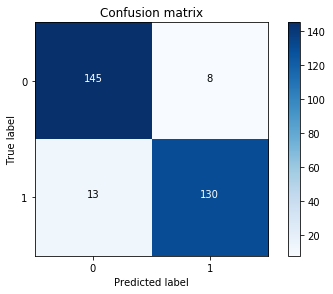

In [22]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
import itertools
model = SVC(kernel="linear")
model.fit(train_x_us,train_y_us)
pred_y_us = model.predict(test_x_us)

# Compute confusion matrix
confusion_matrix_ = confusion_matrix(test_y_us,pred_y_us)
np.set_printoptions(precision=2)
print("下采样SVM数据集召回率Recall: ", confusion_matrix_[1,1]/(confusion_matrix_[1,0]+confusion_matrix_[1,1]))
classes = [0,1]
plt.figure()
plt_confusion(confusion_matrix_, classes=classes, title='Confusion matrix')
plt.show()

源数据集svm召回率Recall:  0.8235294117647058


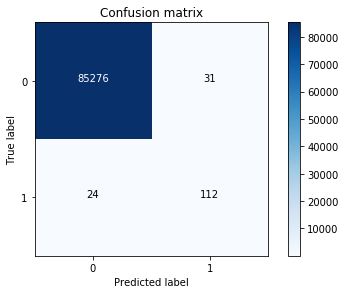

In [23]:
import itertools
model = SVC(kernel="linear")
model.fit(train_x,train_y)
pred_y= model.predict(test_x)

# Compute confusion matrix
confusion_matrix_ = confusion_matrix(test_y,pred_y)
np.set_printoptions(precision=2)
print("源数据集svm召回率Recall: ", confusion_matrix_[1,1]/(confusion_matrix_[1,0]+confusion_matrix_[1,1]))
classes = [0,1]
plt.figure()
plt_confusion(confusion_matrix_, classes=classes, title='Confusion matrix')
plt.show()

In [ ]:
import itertools
model = SVC(kernel="linear")
model.fit(train_x,train_y)
pred_y= model.predict(data[feats])

# Compute confusion matrix
confusion_matrix_ = confusion_matrix(data['Class'],pred_y)
np.set_printoptions(precision=2)
print("所有源数据集svm召回率Recall: ", confusion_matrix_[1,1]/(confusion_matrix_[1,0]+confusion_matrix_[1,1]))
classes = [0,1]
plt.figure()
plt_confusion(confusion_matrix_, classes=classes, title='Confusion matrix')
plt.show()